## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [154]:
from sklearn.datasets import load_boston
%matplotlib inline
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [19]:
data = load_boston()

In [32]:
feature = data['feature_names']

In [26]:
x, y = data['data'], data['target']

In [37]:
x_rm = x[:,5]

In [44]:
x.shape, y.shape, feature.shape, feature[5], x.dtype, y.dtype

((506, 13), (506,), (13,), 'RM', dtype('float64'), dtype('float64'))

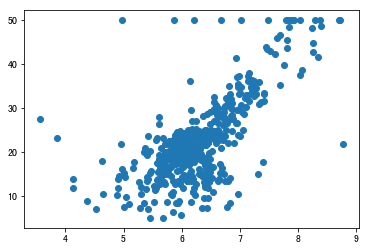

In [39]:
plt.scatter(x_rm, y)

In [54]:
tmp = np.random.random(10)-0.5

In [56]:
tmp, np.average(tmp), np.mean(tmp)

(array([ 0.30204179, -0.17292732,  0.45170795, -0.45521895, -0.23408983,
        -0.2091107 ,  0.08429864, -0.17972551,  0.27412296,  0.27687801]),
 0.013797703945059992,
 0.013797703945059992)

In [40]:
def price(rm, k, b):
    return k*rm+b

In [157]:
def get_loss(y, y_est):
#     return np.mean(np.abs(y-y_est))
    return np.mean((y-y_est)**2)

In [166]:
iterations = 2000
best_loss = float('inf')
best_k, best_b = None, None
for i in range(iterations):
    k, b = random.random()*200-50, random.random()*200-50
    price_est = price(x_rm, k, b)
    loss = get_loss(y, price_est)
    if loss < best_loss:
        best_loss = loss
        best_k, best_b = k, b
        print('with best_k = {} and best_b = {} get best_loss: {}'.format(best_k, best_b, best_loss))

with best_k = 141.5449100384997 and best_b = -40.677857243469994 get best_loss: 691535.9496902699
with best_k = 31.519960648072882 and best_b = 12.164318918166359 get best_loss: 35531.112137589575
with best_k = 26.306702022329603 and best_b = -23.977081215381467 get best_loss: 14307.182195290647
with best_k = 13.72414277080756 and best_b = 5.883174669797327 get best_loss: 4898.507140188879
with best_k = -4.888028505297726 and best_b = 39.35239605378038 get best_loss: 333.2395320700629
with best_k = 3.5171918181951227 and best_b = -10.543039473468326 get best_loss: 179.34394885866587
with best_k = 8.778152809148956 and best_b = -23.605928442651457 get best_loss: 125.17051752914375
with best_k = 3.983410497633159 and best_b = -7.638514448708868 get best_loss: 82.89889803374219
with best_k = 7.403806736537646 and best_b = -19.855100621633426 get best_loss: 62.18034264569435
with best_k = 5.039735884342193 and best_b = -10.357834675356912 get best_loss: 53.21433879569312
with best_k = 9.47

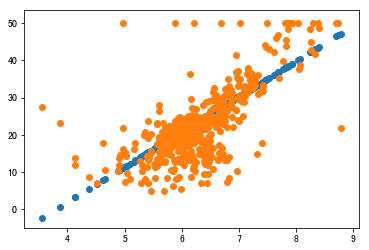

In [177]:
plt.scatter(x_rm, price(x_rm, 9.4718, -35.9774))
plt.scatter(x_rm, y)

In [121]:
dir = np.array([[1, 1],[1, -1],[-1, 1],[-1, -1]], dtype = np.float)
dir[random.choice(range(4))]
random.choice(dir)

array([-1., -1.])

In [175]:
iterations = 2000
scale = 0.1
best_loss = float('inf')
best_k, best_b = random.random()*200-100, random.random()*200-100
dirs = np.array([[1, 1],[1, -1],[-1, 1],[-1, -1]], dtype = np.float)
dir = random.choice(dirs)
for i in range(iterations):
    k = best_k + dir[0]*scale
    b = best_b + dir[1]*scale
    price_est = price(x_rm, k, b)
    loss = get_loss(y, price_est)
    if loss < best_loss:
        best_loss = loss
        best_k, best_b = k, b
        print('with best_k = {} and best_b = {} get best_loss: {}'.format(best_k, best_b, best_loss)) 
        dir = dir
    else:
        dir = random.choice(dirs)

with best_k = 49.40621549400546 and best_b = -71.52039023641441 get best_loss: 47693.16409223376
with best_k = 49.30621549400546 and best_b = -71.42039023641442 get best_loss: 47460.70831970992
with best_k = 49.206215494005455 and best_b = -71.32039023641443 get best_loss: 47228.82094830256
with best_k = 49.106215494005454 and best_b = -71.22039023641443 get best_loss: 46997.50197801168
with best_k = 49.00621549400545 and best_b = -71.12039023641444 get best_loss: 46766.751408837285
with best_k = 48.90621549400545 and best_b = -71.02039023641444 get best_loss: 46536.569240779376
with best_k = 48.80621549400545 and best_b = -70.92039023641445 get best_loss: 46306.95547383794
with best_k = 48.70621549400545 and best_b = -70.82039023641445 get best_loss: 46077.91010801299
with best_k = 48.60621549400545 and best_b = -70.72039023641446 get best_loss: 45849.43314330452
with best_k = 48.506215494005446 and best_b = -70.62039023641447 get best_loss: 45621.52457971254
with best_k = 48.40621549

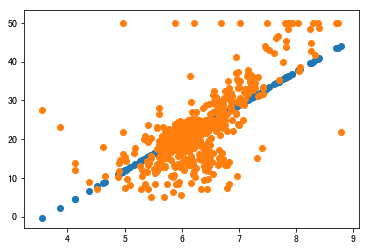

In [176]:
plt.scatter(x_rm, price(x_rm, 8.5062, -30.6203902))
plt.scatter(x_rm, y)

loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: Sometime the formula is too complicated to create directly,and need to re-create the formula if the date/condition is changed everytime.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: Take too much time and samples, the final loss is limited

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:Yes.It can not get the loss smaller for every step

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: Improve iteration speed.

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [12]:
import requests
import re
from collections import defaultdict
import networkx as nx
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [13]:
def get_url_text(url):
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    response = requests.get(url, headers=headers)
    text = response.content.decode('utf8')
    return text

In [15]:
stations = {}
response = requests.get('https://www.bjsubway.com/station/xltcx/', verify=False)
text = response.content.decode('gb2312')

## get sub text from  <div class="subway_num1">1号线</div>  to  <div class="line_name">
## <div class="subway_num5" style="background-color:#B35A20;">S1线</div>
sub_text = re.findall(r'<div\sclass=\"subway_num\w+\">(\w+线)</div>([\s\S]*?)<div\sclass=\"line_name\">', text)
sub_text = sub_text + re.findall(r'<div\sclass=\"subway_num\w+\"\sstyle=\"background-color:#B35A20;\">(\w+线)</div>([\s\S]*?)<div\sclass=\"other\"', text)
print(len(sub_text))
[sub_text[i][0] for i in range(len(sub_text))]


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


20


['1号线',
 '2号线',
 '4号线',
 '5号线',
 '6号线',
 '7号线',
 '8号线',
 '9号线',
 '10号线',
 '13号线',
 '14号线',
 '15号线',
 '16号线',
 '八通线',
 '昌平线',
 '亦庄线',
 '房山线',
 '机场线',
 '大兴线',
 'S1线']

In [16]:
all_stations = {}
for line_text in sub_text:
    line = line_text[0]
    ## <div class="station"><a href="/station/xltcx/linejc/2013-08-26/265.html">东直门</a></div>
    ## <div class="station">西红门</div>
    line_stations = re.findall(r'<div\sclass=\"station\">(<a\shref=\"[/\w\.-]+\">)?(\w+)</', line_text[1])

    for station in line_stations:
        if not station[1][-1] == '站':
            station_z = station[1] + '站'  
        else: 
            station_z = station[1]
            
        if station_z in all_stations:
            all_stations[station_z][1].append(line)
        else:
            all_stations[station_z] = ['https://baike.baidu.com/item/'+station_z, [line]]
   

In [17]:
def get_connection(station, stations):
    print(stations[station][0]) 
    text = get_url_text(stations[station][0])
    
    ## 下一站：<a target=_blank href="/item/%E5%AE%89%E5%AE%9A%E9%97%A8%E7%AB%99">安定门站
    ## 下一站：<a target=_blank href="/item/%E9%BB%84%E5%8E%82%E7%AB%99/23594009" data-lemmaid="23594009">黄厂站</a>     
    connections = re.findall(r'下一?站\：<a\starget=_blank\shref=\"[\w%\/]+\"[\s\w\"\d\-\=]*>(\w+站)', text)
    
    ## <div class="para" label-module="para">（下一站：小园站）</div>
    ## label-module="para">下一站：西土城站</div>
    connections = connections + re.findall(r'label-module=\"para\">\（?下一站：(\w+站)\）?</div>', text)
        
    if not connections:
        sub_text = re.findall(r'>前方车站<([\s\S]*?)>站间距离<', text)
        if sub_text:
            connections = re.findall(r'>\w+站<', sub_text[0])    
            
        if not connections:   
            ## <li class="item">▪<a title="北京地铁10号线车站" href='/item/%E5%8A%B2%E6%9D%BE%E7%AB%99/16750789#viewPageContent'>北京地铁10号线车站</a></li>
            url_text = re.findall(r'href=\'([\w%/#]+)\'>北京地铁\w+', text)
            if not url_text:
                ## href="/item/%E9%AB%98%E7%A2%91%E5%BA%97%E7%AB%99/15410420" data-lemmaid="15410420">高碑店站：北京地铁
                url_text = re.findall(r'href=\"([\w%\/]+)\"[\s\w\"\-\=]*>\w+站\：北京地铁', text)

            if url_text:
                url = 'https://baike.baidu.com' + url_text[0]
                print(url)
                text = get_url_text(url)
                connections = re.findall(r'下一站\：<a\starget=_blank\shref=\"[\w%\/]+\"[\s\w\"\d\-\=]*>(\w+站)', text)
                connections = connections + re.findall(r'label-module=\"para\">\（?下一站：(\w+站)\）?<a\starget', text)
     
    ## really special cases:
    if station == '七里庄站':
        connections = ['六里桥站', '丰台东大街站', '大井站', '西局站']
    if station == '宋家庄站':
        connections = ['成寿寺站', '石榴庄站', '刘家窑站', '肖村站']
    print(station, 'is connected to', connections) 
    
    return connections

In [18]:
get_connection('磁器口站', all_stations)

https://baike.baidu.com/item/磁器口站
https://baike.baidu.com/item/%E7%A3%81%E5%99%A8%E5%8F%A3%E7%AB%99/2485819
磁器口站 is connected to ['天坛东门站', '崇文门站', '广渠门内站', '桥湾站']


['天坛东门站', '崇文门站', '广渠门内站', '桥湾站']

In [19]:
station_connections = {}
for station, url_line in all_stations.items():
    station_connections[station] = [get_connection(station, all_stations), url_line[1]]

https://baike.baidu.com/item/苹果园站
苹果园站 is connected to ['福寿岭站', '古城站', '杨庄站', '金安桥站', '金安桥站']
https://baike.baidu.com/item/古城站
古城站 is connected to ['八角游乐园站']
https://baike.baidu.com/item/八角游乐园站
八角游乐园站 is connected to ['古城站', '八宝山站']
https://baike.baidu.com/item/八宝山站
八宝山站 is connected to ['八角游乐园站', '玉泉路站']
https://baike.baidu.com/item/玉泉路站
玉泉路站 is connected to ['八宝山站', '五棵松站']
https://baike.baidu.com/item/五棵松站
五棵松站 is connected to ['玉泉路站', '万寿路站']
https://baike.baidu.com/item/万寿路站
万寿路站 is connected to ['五棵松站', '公主坟站']
https://baike.baidu.com/item/公主坟站
公主坟站 is connected to ['万寿路站', '军事博物馆站', '西钓鱼台站', '莲花桥站']
https://baike.baidu.com/item/军事博物馆站
军事博物馆站 is connected to ['公主坟站', '木樨地站', '北京西站', '白堆子站']
https://baike.baidu.com/item/木樨地站
木樨地站 is connected to ['南礼士路站', '玉渊潭东门站']
https://baike.baidu.com/item/南礼士路站
南礼士路站 is connected to ['木樨地站', '复兴门站']
https://baike.baidu.com/item/复兴门站
复兴门站 is connected to ['阜成门站', '长椿街站', '南礼士路站', '西单站']
https://baike.baidu.com/item/西单站
西单站 is connected to ['复兴

十里堡站 is connected to ['金台路站', '青年路站']
https://baike.baidu.com/item/青年路站
青年路站 is connected to ['十里堡站', '褡裢坡站']
https://baike.baidu.com/item/褡裢坡站
褡裢坡站 is connected to ['青年路站', '黄渠站']
https://baike.baidu.com/item/黄渠站
黄渠站 is connected to ['褡裢坡站', '常营站']
https://baike.baidu.com/item/常营站
常营站 is connected to ['黄渠站', '草房站']
https://baike.baidu.com/item/草房站
草房站 is connected to ['常营站', '物资学院路站']
https://baike.baidu.com/item/物资学院路站
物资学院路站 is connected to ['草房站', '通州北关站']
https://baike.baidu.com/item/通州北关站
通州北关站 is connected to ['物资学院路站', '通运门站']
https://baike.baidu.com/item/通运门站
通运门站 is connected to ['通州北关站', '北运河西站']
https://baike.baidu.com/item/北运河西站
北运河西站 is connected to ['通运门站', '北运河东站']
https://baike.baidu.com/item/北运河东站
北运河东站 is connected to ['北运河西站', '郝家府站']
https://baike.baidu.com/item/郝家府站
郝家府站 is connected to ['北运河东站', '东夏园站']
https://baike.baidu.com/item/东夏园站
东夏园站 is connected to ['郝家府站', '潞城站']
https://baike.baidu.com/item/潞城站
潞城站 is connected to ['东夏园站']
https://baike.baidu.com/item/

丰台站 is connected to ['泥洼站', '首经贸站', '丰台南路站']
https://baike.baidu.com/item/泥洼站
泥洼站 is connected to ['西局站', '丰台站']
https://baike.baidu.com/item/西局站
西局站 is connected to ['六里桥站', '泥洼站', '七里庄站']
https://baike.baidu.com/item/莲花桥站
莲花桥站 is connected to ['公主坟站', '六里桥站']
https://baike.baidu.com/item/西钓鱼台站
西钓鱼台站 is connected to ['慈寿寺站', '公主坟站']
https://baike.baidu.com/item/车道沟站
车道沟站 is connected to ['长春桥站', '慈寿寺站']
https://baike.baidu.com/item/长春桥站
长春桥站 is connected to ['火器营站', '车道沟站', '远大路站', '苏州桥站']
https://baike.baidu.com/item/火器营站
火器营站 is connected to ['巴沟站', '长春桥站']
https://baike.baidu.com/item/大钟寺站
大钟寺站 is connected to ['知春路站', '人民大学站', '蓟门桥站', '西直门站']
https://baike.baidu.com/item/五道口站
五道口站 is connected to ['知春路站', '上地站']
https://baike.baidu.com/item/上地站
上地站 is connected to ['五道口站', '西二旗站']
https://baike.baidu.com/item/西二旗站
西二旗站 is connected to ['上地站', '龙泽站', '生命科学园站']
https://baike.baidu.com/item/龙泽站
龙泽站 is connected to ['西二旗站', '回龙观站']
https://baike.baidu.com/item/回龙观站
回龙观站 is connected t

长阳站 is connected to ['稻田站', '篱笆房站']
https://baike.baidu.com/item/篱笆房站
篱笆房站 is connected to ['长阳站', '广阳城站']
https://baike.baidu.com/item/广阳城站
广阳城站 is connected to ['篱笆房站', '良乡大学城北站']
https://baike.baidu.com/item/良乡大学城北站
良乡大学城北站 is connected to ['广阳城站', '良乡大学城站']
https://baike.baidu.com/item/良乡大学城站
良乡大学城站 is connected to ['良乡大学城北站', '良乡大学城西站']
https://baike.baidu.com/item/良乡大学城西站
良乡大学城西站 is connected to ['良乡大学城站', '良乡南关站']
https://baike.baidu.com/item/良乡南关站
良乡南关站 is connected to ['良乡大学城西站', '苏庄站']
https://baike.baidu.com/item/苏庄站
苏庄站 is connected to ['良乡南关站', '阎村东站']
https://baike.baidu.com/item/3号航站楼站
3号航站楼站 is connected to ['2号航站楼站']
https://baike.baidu.com/item/2号航站楼站
2号航站楼站 is connected to ['三元桥站']
https://baike.baidu.com/item/新宫站
新宫站 is connected to ['西红门站', '公益西桥站']
https://baike.baidu.com/item/西红门站
西红门站 is connected to ['高米店北站', '新宫站']
https://baike.baidu.com/item/高米店北站
高米店北站 is connected to ['高米店南站', '西红门站']
https://baike.baidu.com/item/高米店南站
高米店南站 is connected to ['枣园站', '高米店北站'

In [20]:
def get_longitude_latitude(station):
    ## items = {'location': '31,117', 'ak': '你所申请的AK', 'output': 'json'}
    ## res = requests.get('http://api.map.baidu.com/geocoder/v2/', params=items)
    addr =  '北京市地铁'+station
    print(addr)
    parameters = { 'address': addr, 'key': 'c69bd09bde2e2a17eff5edf9b89720a5'}
    base = 'https://restapi.amap.com/v3/geocode/geo'
    response = requests.get(base, parameters, timeout= 2)
    if response.status_code == 200:
        answer = response.json()
        x, y = answer['geocodes'][0]['location'].split(',')
        coor = (float(x), float(y))
        print(station, coor)
        return coor

In [21]:
get_longitude_latitude('杨庄站')

北京市地铁杨庄站
杨庄站 (116.407526, 39.90403)


(116.407526, 39.90403)

In [22]:
station_coor = {}
for station in all_stations.keys():
    station_coor[station] = get_longitude_latitude(station)

北京市地铁苹果园站
苹果园站 (116.178684, 39.926352)
北京市地铁古城站
古城站 (116.190813, 39.9075)
北京市地铁八角游乐园站
八角游乐园站 (116.224351, 39.910415)
北京市地铁八宝山站
八宝山站 (116.236066, 39.906763)
北京市地铁玉泉路站
玉泉路站 (116.253128, 39.907061)
北京市地铁五棵松站
五棵松站 (116.294426, 39.907444)
北京市地铁万寿路站
万寿路站 (116.294765, 39.907474)
北京市地铁公主坟站
公主坟站 (116.309035, 39.906507)
北京市地铁军事博物馆站
军事博物馆站 (116.323385, 39.907422)
北京市地铁木樨地站
木樨地站 (116.3396, 39.90575)
北京市地铁南礼士路站
南礼士路站 (116.352073, 39.907296)
北京市地铁复兴门站
复兴门站 (116.357115, 39.908136)
北京市地铁西单站
西单站 (116.376491, 39.907781)
北京市地铁天安门西站
天安门西站 (116.3882, 39.90725)
北京市地铁天安门东站
天安门东站 (116.400642, 39.907341)
北京市地铁王府井站
王府井站 (116.411438, 39.908009)
北京市地铁东单站
东单站 (116.418413, 39.908608)
北京市地铁建国门站
建国门站 (116.43592, 39.90848)
北京市地铁永安里站
永安里站 (116.452349, 39.907049)
北京市地铁国贸站
国贸站 (116.459613, 39.907824)
北京市地铁大望路站
大望路站 (116.472782, 39.902303)
北京市地铁四惠站
四惠站 (116.496588, 39.909649)
北京市地铁四惠东站
四惠东站 (116.515664, 39.908495)
北京市地铁西直门站
西直门站 (116.352442, 39.941622)
北京市地铁积水潭站
积水潭站 (116.372796, 39.94809)
北京市地铁鼓楼大街站
鼓楼大街站 (116.393467, 39

大瓦窑站 (116.179539, 39.867095)
北京市地铁郭庄子站
郭庄子站 (116.252475, 39.866321)
北京市地铁大井站
大井站 (116.275, 39.86525)
北京市地铁善各庄站
善各庄站 (116.407526, 39.90403)
北京市地铁陶然桥站
陶然桥站 (116.407526, 39.90403)
北京市地铁景泰站
景泰站 (116.411022, 39.865344)
北京市地铁方庄站
方庄站 (116.434507, 39.855029)
北京市地铁北工大西门站
北工大西门站 (116.407526, 39.90403)
北京市地铁平乐园站
平乐园站 (116.316229, 39.978517)
北京市地铁朝阳公园站
朝阳公园站 (116.486271, 39.878574)
北京市地铁枣营站
枣营站 (116.407526, 39.90403)
北京市地铁东风北桥站
东风北桥站 (116.407526, 39.90403)
北京市地铁高家园站
高家园站 (116.487152, 39.97949)
北京市地铁阜通站
阜通站 (116.474242, 39.992133)
北京市地铁望京站
望京站 (116.469285, 39.998747)
北京市地铁将台站
将台站 (116.490036, 39.971899)
北京市地铁望京南站
望京南站 (116.479587, 39.986471)
北京市地铁东湖渠站
东湖渠站 (116.466606, 40.009546)
北京市地铁来广营站
来广营站 (116.469786, 40.019082)
北京市地铁俸伯站
俸伯站 (116.6087, 40.12825)
北京市地铁顺义站
顺义站 (116.645644, 40.125954)
北京市地铁石门站
石门站 (116.641117, 40.129802)
北京市地铁南法信站
南法信站 (116.493803, 40.022625)
北京市地铁后沙峪站
后沙峪站 (116.560919, 40.120009)
北京市地铁花梨坎站
花梨坎站 (116.641117, 40.129802)
北京市地铁国展站
国展站 (116.407526, 39.90403)
北京市地铁孙河站
孙河站 (116.3977, 

In [24]:
station_coor_graph = nx.Graph()
station_coor_graph.add_nodes_from(list(station_coor.keys()))

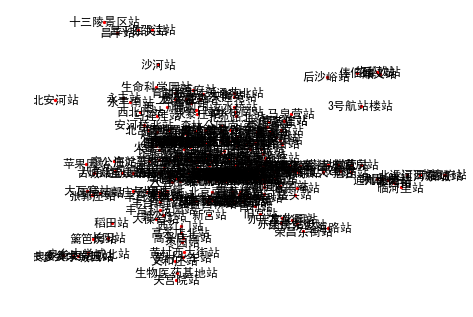

In [25]:
nx.draw(station_coor_graph, station_coor, with_labels = True, node_size = 5)

In [41]:
station_connect = {}
for key, val in station_connections.items():
    tmp = []
    for station in val[0]:
        if station in all_stations:
            tmp.append(station)
    station_connect[key] = tuple(tmp)

In [45]:
station_connect

{'苹果园站': ('古城站', '杨庄站', '金安桥站', '金安桥站'),
 '古城站': ('八角游乐园站',),
 '八角游乐园站': ('古城站', '八宝山站'),
 '八宝山站': ('八角游乐园站', '玉泉路站'),
 '玉泉路站': ('八宝山站', '五棵松站'),
 '五棵松站': ('玉泉路站', '万寿路站'),
 '万寿路站': ('五棵松站', '公主坟站'),
 '公主坟站': ('万寿路站', '军事博物馆站', '西钓鱼台站', '莲花桥站'),
 '军事博物馆站': ('公主坟站', '木樨地站', '北京西站', '白堆子站'),
 '木樨地站': ('南礼士路站',),
 '南礼士路站': ('木樨地站', '复兴门站'),
 '复兴门站': ('阜成门站', '长椿街站', '南礼士路站', '西单站'),
 '西单站': ('复兴门站', '天安门西站', '宣武门站', '灵境胡同站'),
 '天安门西站': ('西单站', '天安门东站'),
 '天安门东站': ('天安门西站', '王府井站'),
 '王府井站': ('天安门东站', '东单站', '前门站', '永安里站'),
 '东单站': ('王府井站', '建国门站', '崇文门站', '灯市口站'),
 '建国门站': ('北京站', '朝阳门站', '东单站', '永安里站'),
 '永安里站': ('建国门站', '国贸站'),
 '国贸站': ('永安里站', '大望路站', '双井站', '金台夕照站'),
 '大望路站': ('国贸站', '四惠站', '九龙山站'),
 '四惠站': ('大望路站', '四惠东站', '四惠东站'),
 '四惠东站': ('四惠站', '四惠站', '高碑店站'),
 '西直门站': ('积水潭站', '车公庄站', '大钟寺站', '动物园站'),
 '积水潭站': ('鼓楼大街站',),
 '鼓楼大街站': ('安定门站', '积水潭站', '什刹海站', '安德里北街站'),
 '安定门站': ('雍和宫站', '鼓楼大街站'),
 '雍和宫站': ('东直门站', '安定门站', '北新桥站', '和平里北街站'),
 '东直门站': ('东四十条站', '雍和宫站', '柳芳站', '三元桥站'

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


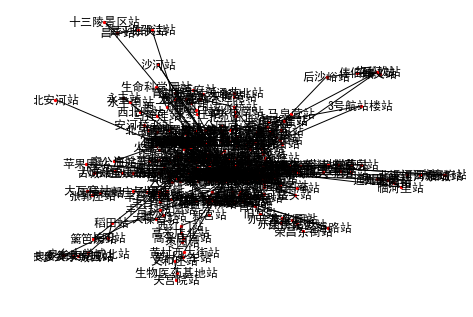

In [46]:
station_connect_graph = nx.Graph(station_connect)
nx.draw(station_connect_graph, station_coor,with_labels=True, node_size=5)

In [48]:
def get_distance(city1, city2, city_coor):
    if not city1 in city_coor or not city2 in city_coor:
        return 0
    
    lon1, lat1 = city_coor[city1]
    lon2, lat2 = city_coor[city2]
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [49]:
def length(path):
    return sum(get_distance(path[i], path[i+1], city_coor) for i in range(len(path)-1))

In [33]:
def max_length(paths):
    def length(path):
        return sum(get_distance(path[i], path[i+1], city_coor) for i in range(len(path)-1))
    return sorted(paths, key=length, reverse=True)

In [34]:
def min_len(paths):
    return sorted(paths, key=len, reverse=False)

In [35]:
def pretty_print(stations):
    print('🚗->'.join(stations))

In [36]:
def search(start, end, graph, sort):
    
    paths = []
    paths_candidate = [[start]]
    visited = []
    
    while paths_candidate:      
        path = paths_candidate.pop(0)
        
        extend_city = path[-1]
        
        if extend_city in visited or extend_city == end: continue
            
        for adjcent_city in graph[extend_city]:             
            new_path = path + [adjcent_city]
            paths_candidate.append(new_path)
            if adjcent_city == end:
                paths.append(new_path)
            
        visited.append(extend_city)
        
    paths = sort(paths)
    pretty_print(paths[0])   
    return paths

In [63]:
def search2(start, end, graph, sort):
    
    paths_candidate = [[start]]
    
    while paths_candidate:      
        path = paths_candidate.pop(0)
        
        extend_city = path[-1]
        
        if extend_city == end: continue
            
        for adjcent_city in graph[extend_city]:
            if not adjcent_city in path:
                new_path = path + [adjcent_city]
                paths_candidate.append(new_path)
                if adjcent_city == end:
                    if sort(paths_candidate)[0] == new_path:
                        pretty_print(new_path) 
                        return new_path

In [64]:
search2('郭公庄站', '丰台东大街站', station_connect, min_len)

郭公庄站🚗->丰台科技园站🚗->科怡路站🚗->丰台南路站🚗->丰台东大街站


['郭公庄站', '丰台科技园站', '科怡路站', '丰台南路站', '丰台东大街站']

In [65]:
search('郭公庄站', '2号航站楼站', station_connect, min_len)

郭公庄站🚗->丰台科技园站🚗->科怡路站🚗->丰台南路站🚗->丰台东大街站🚗->七里庄站🚗->六里桥站🚗->六里桥东站🚗->北京西站🚗->军事博物馆站🚗->白堆子站🚗->白石桥南站🚗->国家图书馆站🚗->动物园站🚗->西直门站🚗->积水潭站🚗->鼓楼大街站🚗->安定门站🚗->雍和宫站🚗->东直门站🚗->三元桥站🚗->3号航站楼站🚗->2号航站楼站


[['郭公庄站',
  '丰台科技园站',
  '科怡路站',
  '丰台南路站',
  '丰台东大街站',
  '七里庄站',
  '六里桥站',
  '六里桥东站',
  '北京西站',
  '军事博物馆站',
  '白堆子站',
  '白石桥南站',
  '国家图书馆站',
  '动物园站',
  '西直门站',
  '积水潭站',
  '鼓楼大街站',
  '安定门站',
  '雍和宫站',
  '东直门站',
  '三元桥站',
  '3号航站楼站',
  '2号航站楼站']]

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)